In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandata/Loan payments data.csv


## Describing Data

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

* Loan_id: A unique loan number assigned to each loan customers

* Loan_status: Whether a loan is paid off, in collection, new customer yet to pay off, or paid off after the collection efforts
 
* Principal: Basic principal loan amount at the origination
 
* terms: Can be weekly (7 days), biweekly, and monthly payoff schedule
 
* Effective_date: When the loan got originated and took effects

* Due_date: Since it’s one-time payoff schedule, each loan has one single due date

* Paidoff_time: The actual time a customer pays off the loan

* Pastdue_days: How many days a loan has been past due

* Age, education, gender A customer’s basic demographic information

## Load and Check Data

In [2]:
df=pd.read_csv("/kaggle/input/loandata/Loan payments data.csv")

In [3]:
df.info

<bound method DataFrame.info of          Loan_ID         loan_status  Principal  terms effective_date  \
0    xqd20166231             PAIDOFF       1000     30       9/8/2016   
1    xqd20168902             PAIDOFF       1000     30       9/8/2016   
2    xqd20160003             PAIDOFF       1000     30       9/8/2016   
3    xqd20160004             PAIDOFF       1000     15       9/8/2016   
4    xqd20160005             PAIDOFF       1000     30       9/9/2016   
..           ...                 ...        ...    ...            ...   
495  xqd20160496  COLLECTION_PAIDOFF       1000     30      9/12/2016   
496  xqd20160497  COLLECTION_PAIDOFF       1000     15      9/12/2016   
497  xqd20160498  COLLECTION_PAIDOFF        800     15      9/12/2016   
498  xqd20160499  COLLECTION_PAIDOFF       1000     30      9/12/2016   
499  xqd20160500  COLLECTION_PAIDOFF       1000     30      9/12/2016   

       due_date     paid_off_time  past_due_days  age             education  \
0     10/7/2

In [4]:
df.shape

(500, 11)

In [5]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [7]:
df.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [8]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

* paid_off_time and past_due_days have null values.

In [9]:
{column:len(df[column].unique()) for column in df.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [10]:
list=["loan_status","education","Gender"]
for i in list:
    print(df[i].unique())

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']
['High School or Below' 'Bechalor' 'college' 'Master or Above']
['male' 'female']


# Filling Missing Value: paid_off_time

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


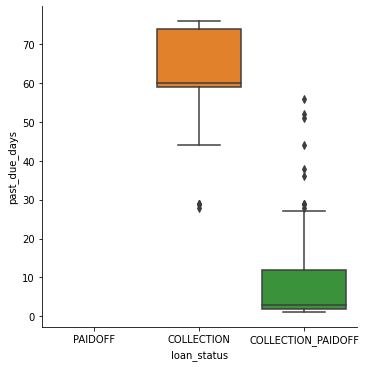

In [11]:
g=sns.factorplot(x="loan_status",y="past_due_days",data=df,kind="box")
plt.show()

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


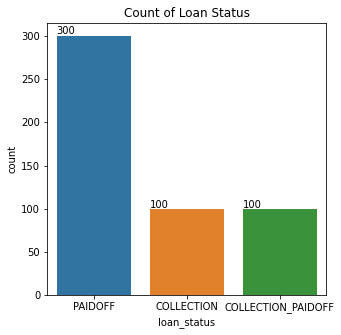

In [12]:
print(df.loan_status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(df.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

* Put both of plot together!
* There are 300 missing values in past_due_days
* Paidoff category have not any past_due_days
* The count of paidoff category is 300.
* So we can say that there are not missing values in past_due_days actually.

In [13]:
df['past_due_days'] = df['past_due_days'].fillna(0)

In [14]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [15]:
df[df["paid_off_time"].isnull()].head(20)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
305,xqd20160306,COLLECTION,1000,15,9/10/2016,9/24/2016,NaN,75.0,31,High School or Below,female
306,xqd20160307,COLLECTION,800,15,9/10/2016,10/9/2016,NaN,60.0,28,college,male
307,xqd20160308,COLLECTION,1000,30,9/10/2016,10/9/2016,NaN,60.0,40,High School or Below,male
308,xqd20160309,COLLECTION,1000,30,9/10/2016,10/9/2016,NaN,60.0,33,college,male
309,xqd20160310,COLLECTION,800,15,9/10/2016,9/24/2016,NaN,75.0,41,college,male


In [16]:
df[df["paid_off_time"].isnull()].tail(21)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
379,xqd20160380,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,32,college,male
380,xqd20160381,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,High School or Below,male
381,xqd20160382,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,35,High School or Below,male
382,xqd20175721,COLLECTION,1000,15,9/11/2016,9/25/2016,NaN,74.0,30,Bechalor,male
383,xqd20160384,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,26,High School or Below,male
384,xqd20160385,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,29,High School or Below,male
385,xqd20160386,COLLECTION,1000,30,9/11/2016,11/9/2016,NaN,29.0,26,High School or Below,male
386,xqd20160387,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,46,High School or Below,male
387,xqd20160388,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,36,High School or Below,male
388,xqd20160389,COLLECTION,1000,15,9/11/2016,9/25/2016,NaN,74.0,38,Bechalor,male


* The paid_off_time has 100 missing values.
* The count of COLLECTION is 100.
* we can see that from data, missing values of paid_off_time belongs to COLLECTION

In [17]:
df['paid_off_time'] = df['paid_off_time'].fillna(-1)

# Visualization

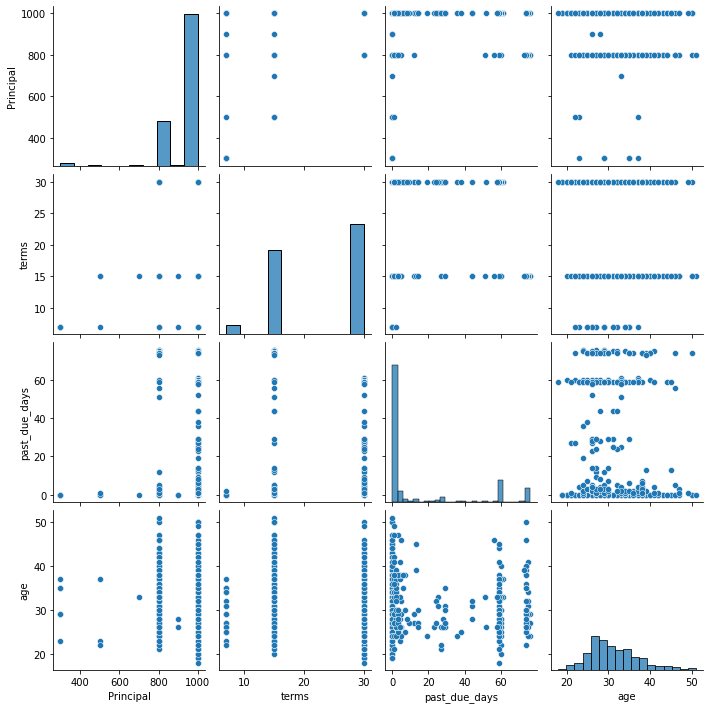

In [18]:
sns.pairplot(df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


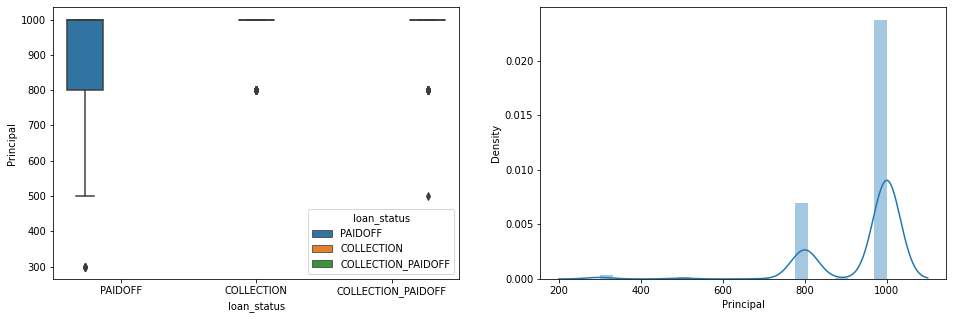

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=df, hue='loan_status', ax=axs[0])
sns.distplot(df.Principal)
plt.show();

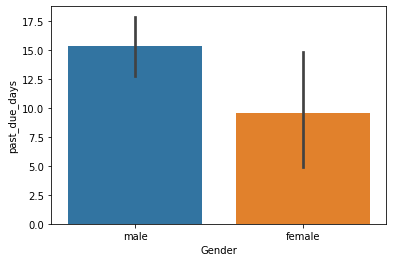

In [20]:
#past_due_days-Gender
g=sns.barplot(x="Gender",y="past_due_days",data=df)

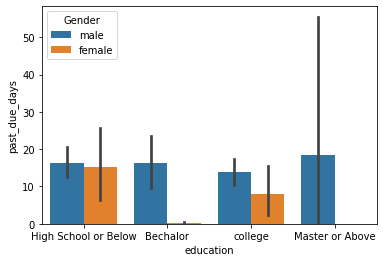

In [21]:
#past_due_days-education-Gender
g=sns.barplot(x="education",y="past_due_days",data=df,hue="Gender")

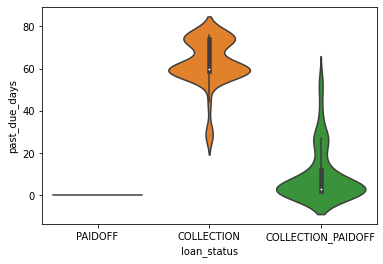

In [22]:
#loan_status-past_due_days
g=sns.violinplot(x="loan_status",y="past_due_days",data=df)

# Pre-processing/EDA

In [23]:
#Firstly,drop loan_id. loan_id is unnecessary because it does not effect anything.
df.drop(["Loan_ID"],inplace=True,axis=1)

In [24]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [25]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time']).dt.date

In [26]:
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

In [27]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bechalor,female
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bechalor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     500 non-null    object        
 1   Principal       500 non-null    int64         
 2   terms           500 non-null    int64         
 3   effective_date  500 non-null    datetime64[ns]
 4   due_date        500 non-null    datetime64[ns]
 5   paid_off_time   500 non-null    datetime64[ns]
 6   past_due_days   500 non-null    float64       
 7   age             500 non-null    int64         
 8   education       500 non-null    object        
 9   Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 39.2+ KB


In [29]:
df.drop(["effective_date"],inplace=True,axis=1)
df.drop(["due_date"],inplace=True,axis=1)
df.drop(["paid_off_time"],inplace=True,axis=1)


In [30]:
#To use models we should convert categorical values.
#I will seperate numerical and categorical variable from each other
categorical=[]
numerical=[]
for i,c in enumerate(df.dtypes):
    if c == object:
        categorical.append(df.iloc[:, i])
    else :
        numerical.append(df.iloc[:, i])


In [31]:
categorical = pd.DataFrame(categorical).transpose()
numerical = pd.DataFrame(numerical).transpose()

In [32]:
categorical.head()

,loan_status,education,Gender
0,PAIDOFF,High School or Below,male
1,PAIDOFF,Bechalor,female
2,PAIDOFF,Bechalor,female
3,PAIDOFF,college,male
4,PAIDOFF,college,female


In [33]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
categorical.head()

,loan_status,education,Gender
0,PAIDOFF,High School or Below,male
1,PAIDOFF,Bechalor,female
2,PAIDOFF,Bechalor,female
3,PAIDOFF,college,male
4,PAIDOFF,college,female


In [34]:
target_values = {'PAIDOFF': 0 , 'COLLECTION' : 1,'COLLECTION_PAIDOFF' : 2}

target = categorical['loan_status']
categorical.drop('loan_status', axis=1, inplace=True)

target = target.map(target_values)

In [35]:
for i in categorical:
    categorical[i] = le.fit_transform(categorical[i])


In [36]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [37]:
categorical.head()

,education,Gender
0,1,1
1,0,0
2,0,0
3,3,1
4,3,0


In [38]:
df = pd.concat([categorical, numerical, target], axis=1)

In [39]:
df.head()

,education,Gender,Principal,terms,past_due_days,age,loan_status
0,1,1,1000.0,30.0,0.0,45.0,0
1,0,0,1000.0,30.0,0.0,50.0,0
2,0,0,1000.0,30.0,0.0,33.0,0
3,3,1,1000.0,15.0,0.0,27.0,0
4,3,0,1000.0,30.0,0.0,28.0,0


In [40]:
df.shape

(500, 7)

In [41]:
X = pd.concat([categorical, numerical], axis=1)
y = target 

In [42]:
X.shape

(500, 6)

In [43]:
y.shape

(500,)

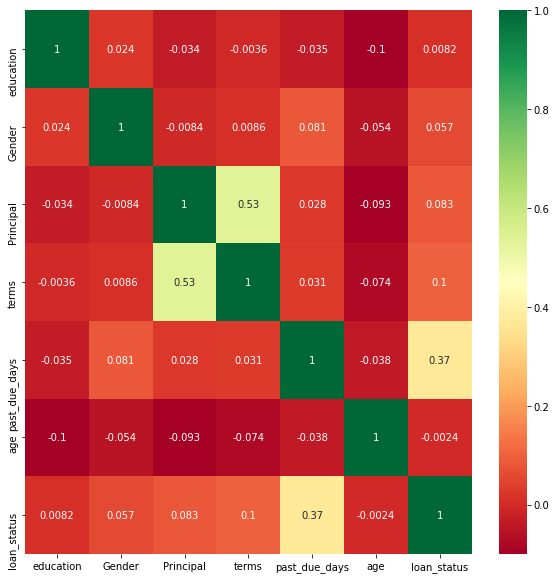

In [44]:
corr=df.corr()
top_corr_features=corr.index
plt.figure(figsize=(10,10))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
X.shape

(500, 6)

In [46]:
y.shape

(500,)

In [47]:
df.shape

(500, 7)

In [48]:
y=y.values.reshape(500,1)

In [49]:
y.shape

(500, 1)

# Modelling

## K-Nearest Neighbour

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

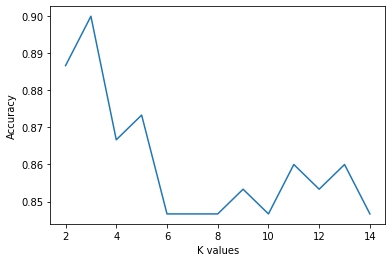

In [51]:
#find best k value for knn algorithm
from sklearn.neighbors import KNeighborsClassifier

score_list=[]
for i in range(2,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
    
plt.plot(range(2,15),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()


* k=3 has best accuracy

In [52]:
knn2=KNeighborsClassifier()
knn2.fit(X_train,y_train)
prediction=knn2.predict(X_test)
#Jaccard Index
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss 
js=jaccard_score(y_test,prediction,average='weighted')
print("Jaccard Index:{}".format(js))
f1=f1_score(y_test,prediction,average='weighted')
print("f1 Score:{}".format(f1))
#LogLoss for KNN=Nan



Jaccard Index:0.7658239538239539
f1 Score:0.8505485349640518


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
prediction2=dt.predict(X_test)
js=jaccard_score(y_test,prediction2,average='weighted')
print("Jaccard Index:{}".format(js))
f1=f1_score(y_test,prediction2,average='weighted')
print("f1 Score:{}".format(f1))
#LogLoss for DecisionTree=Nan

Jaccard Index:0.9497142857142857
f1 Score:0.973221873911529


In [54]:
#Visualizing DecisionTree
from sklearn import tree
tree.export_graphviz(dt)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[4] <= 0.5\\ngini = 0.555\\nsamples = 350\\nvalue = [212, 69, 69]"] ;\n1 [label="gini = 0.0\\nsamples = 212\\nvalue = [212, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 27.5\\ngini = 0.5\\nsamples = 138\\nvalue = [0, 69, 69]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 63\\nvalue = [0, 0, 63]"] ;\n2 -> 3 ;\n4 [label="gini = 0.147\\nsamples = 75\\nvalue = [0, 69, 6]"] ;\n2 -> 4 ;\n}'

In [55]:
dt.predict_proba(X_train)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 0.92, 0.08],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ]])

In [56]:
#SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm

x_sc=StandardScaler()
X_train_t=x_sc.fit_transform(X_train)
X_test=x_sc.transform(X_test)

svm1=svm.SVC(kernel='linear',C=0.01)
svm1.fit(X_test,y_test)

SVC(kernel='linear',C=0.01)

y_train_pre=svm1.predict(X_train)
y_test_pre=svm1.predict(X_test)
y_test_pre
#gridsearch,c=0.1 de dene

js=jaccard_score(y_test,y_test_pre,average='weighted')
print("Jaccard Index:{}".format(js))
f1=f1_score(y_test,y_test_pre,average='weighted')
print("f1 Score:{}".format(f1))
#LogLoss for SVM=Nan

Jaccard Index:0.6353949753949754
f1 Score:0.7038831300813008


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [57]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression


lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pre_proba=lg.predict_proba(X_test)
lg_pre=lg.predict(X_test)


js=jaccard_score(y_test,lg_pre,average='weighted')
print("Jaccard Index:{}".format(js))
f1=f1_score(y_test,lg_pre,average='weighted')
print("f1 Score:{}".format(f1))
lgloss=log_loss(y_test,lg_pre_proba,normalize = True)
print("log loss:{}".format(lgloss))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Jaccard Index:0.6201656314699794
f1 Score:0.6959287766830871
log loss:0.636117132026122


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy for all
